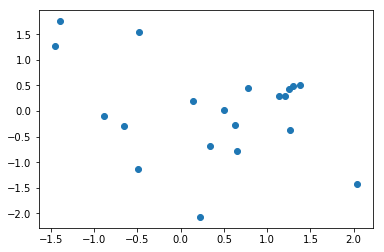

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

a = tf.random_normal([2, 20])
with tf.Session() as sess:
    out = sess.run(a)
    
x, y = out
plt.scatter(x, y)
plt.show()

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

In [2]:
sess = tf.Session()
sess.run([d, e])
writer = tf.summary.FileWriter('./my_graph', sess.graph)
writer.close()
sess.close()

In [3]:
sess = tf.Session()
a = np.array([2, 3], dtype=np.int32)
b = np.array([4, 5], dtype=np.int32)
c = tf.add(a, b)
sess.run(c)

array([6, 8])

In [4]:
# types of objects
t_0 = 50 # zero dimensions
t_1 = [b"apple", b"pear"] # one dimension, 2
t_2 = [[True, False, False], [False, True, True]] # 2 dimensions, 2x3
t_3 = [ [[0, 0], [0, 1], [1, 2]], [[1, 0], [1, 1], [2, 3]] ] # 3 dimensions, 2x3x2


In [12]:
t_0 = np.array(50, dtype=np.int32)
np.shape(t_0)

t_1 = np.array([b"apple", b"pear"])
print("shape %s: %s" % ("t_1", np.shape(t_1)))

t_2 = np.array([
        [True, False, False], 
        [False, True, True]
    ], dtype=np.bool)
print("shape %s: %s" % ("t_2", np.shape(t_2)))

t_3 = np.array([
    [ [0, 0], [0, 1], [1, 2] ],
    [ [1, 0], [1, 1], [2, 3] ]
], dtype=np.int32)
np.shape(t_3)
print("shape %s: %s" % ("t_3", np.shape(t_3)))

shape t_1: (2,)
shape t_2: (2, 3)
shape t_3: (2, 3, 2)


In [19]:
# simple example
a = np.array([2, 3], dtype=np.int32)
b = np.array([4, 5], dtype=np.int32)
c = tf.add(a, b, name="my_add_op")
sess = tf.Session()
sess.run(c)

array([6, 8])

In [26]:
# a graph does not use variables as inputs, but placeholders
a = tf.placeholder(tf.int32, shape=[None], name="my_input")
b = tf.reduce_prod(a, name="prod_b")
c = tf.reduce_sum(a, name="sum_c")
d = tf.add(b, c, name="add_d")

sess = tf.Session()
input_dict = {a: np.array([5, 3, 10], dtype=np.int32)}
sess.run(d, feed_dict=input_dict)

168

# Defining a graph with granular scopes

In [5]:
graph = tf.Graph()
with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name="input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")
    
    with tf.name_scope("Transformation"):
    
        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)

        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)

        with tf.name_scope("C"):
            C_div = tf.div(A_out, B_out)
            C_out = tf.add(C_div, const)

        with tf.name_scope("D"):
            D_div = tf.div(B_out, A_out)
            D_out = tf.add(D_div, const)

    out = tf.maximum(C_out, D_out)
    
writer = tf.summary.FileWriter('./name_scope_2', graph=graph)
writer.close()


# Complex compute graph

In [5]:
import tensorflow as tf

graph = tf.Graph()

with graph.as_default():
    
    with tf.name_scope("variables"):
        # keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name="global_step")
        
        # sum of all output values over time
        total_output = tf.Variable(0, dtype=tf.float32, trainable=False, name="total_output")
        
    with tf.name_scope("transformation"):
        
        with tf.name_scope("input_layer"):
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
            
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
            
        with tf.name_scope("output_layer"):
            output = tf.add(b, c, name="output")
            
    with tf.name_scope("update"):
        update_total = total_output.assign_add(output)
        increment_step = global_step.assign_add(1)
        
    with tf.name_scope("summaries"):
        avg = tf.div(update_total, tf.cast(increment_step, tf.float32), name="average")
        
        # create summaries for output
        tf.summary.scalar(tensor=output, name="output_summary")
        tf.summary.scalar(tensor=update_total, name="total_summary")
        tf.summary.scalar(tensor=avg, name="average_summary")
        
    with tf.name_scope("global_ops"):
        init = tf.initialize_all_variables()
        merged_summaries = tf.summary.merge_all()
        
# helper function        
def run_graph(input_tensor):
    feed_dict = {a: input_tensor}
    _, step, summary = sess.run([output, increment_step, merged_summaries], feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)
        
sess = tf.Session(graph=graph)
writer = tf.summary.FileWriter('./improved_graph', graph=graph)

# first, initialize all variables
sess.run(init)

In [7]:
run_graph([2, 8])
run_graph([3, 1, 3, 3])
run_graph([7, 3, 1])

In [8]:
writer.close()
sess.close()